In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import wordcloud

import glob


/home/becode/anaconda3/envs/NLP/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
filepath = os.path.abspath('../Enron-Email/deployment/data/Enron_by_departments.csv') # Subset with 1K Random Emails
display(filepath)
df = pd.read_csv(filepath)
df.head(2)

'/home/becode/becode/Enron-Email/deployment/data/Enron_by_departments.csv'

,email-body,From,employee,Date,Subject,X-Folder,To,X-cc,X-Origin,year,...,trust,surprise,positive,negative,sadness,disgust,joy,topemotion,time_hour,Work
0,"mary.solmonson@enron.com, martha.stevens@enron...",hector.mcloughlin@enron.com,beck-s,2001-04-04 01:52:00+00:00,Action Request,hr,"sally.beck@enron.com, thresa.allen@enron.com, ...","Sunjay Arya <Sunjay Arya/ENRON@enronXgate>, Jo...",BECK-S,2001,...,0.113872,0.086957,0.118012,0.113872,0.095238,0.095238,0.086957,positive,1,Night
1,Content-Transfer-Encoding: 7bit Bcc: exec.jone...,david.oxley@enron.com,kean-s,2001-12-05 17:20:42+00:00,New HR Contacts - post headcount reduction,hr,"kenneth.lay@enron.com, greg.whalley@enron.com,...","Jones, Robert W.- HR Exec </O=ENRON/OU=NA/CN=R...",Harris-S,2001,...,0.108642,0.083951,0.111111,0.113580,0.098765,0.093827,0.091358,negative,17,Work


<AxesSubplot:ylabel='year,Work'>

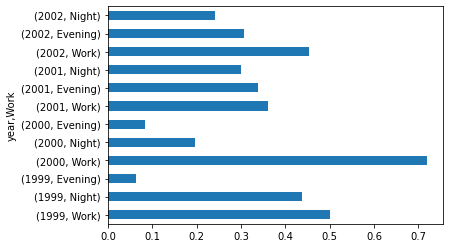

In [3]:
df.groupby("year")["Work"].value_counts(normalize = True).plot.barh()

In [4]:
def WC_Folder(Folder, stpwords = None):
    
    data = df.loc[df['X-Folder'] == Folder]
     
    
    stop_words = stopwords.words('english')
    
    list_stpwords = ['enron', 'com', 're', 'RECIPIENTS', 'CN', 'ENRON', 'OU', 'NA', 'Thank', 'mail', 'know', 'get', 'Thanks', 'one', 'let', 'cc', 'bc', 'subject', 'http', 'www', 'hotmail', 'email', 'would', 'back', 'time', 'bcc','new', 'aol', 'Com', 'Original Message','message']
    
    if stpwords is True:
        
         list_stpwords.append(stpwords) 
        
        
    stop_words.extend(list_stpwords)

    subjects = ' '.join(data['email-body'])

    fig, ax = plt.subplots(figsize=(16, 12))

    wc = wordcloud.WordCloud(width=800, 
                             height=600, 
                             max_words=200,
                             stopwords=stop_words).generate(subjects)
    ax.imshow(wc)
    ax.axis("off")
    
    plot = ax.imshow(wc)
    
    return plot

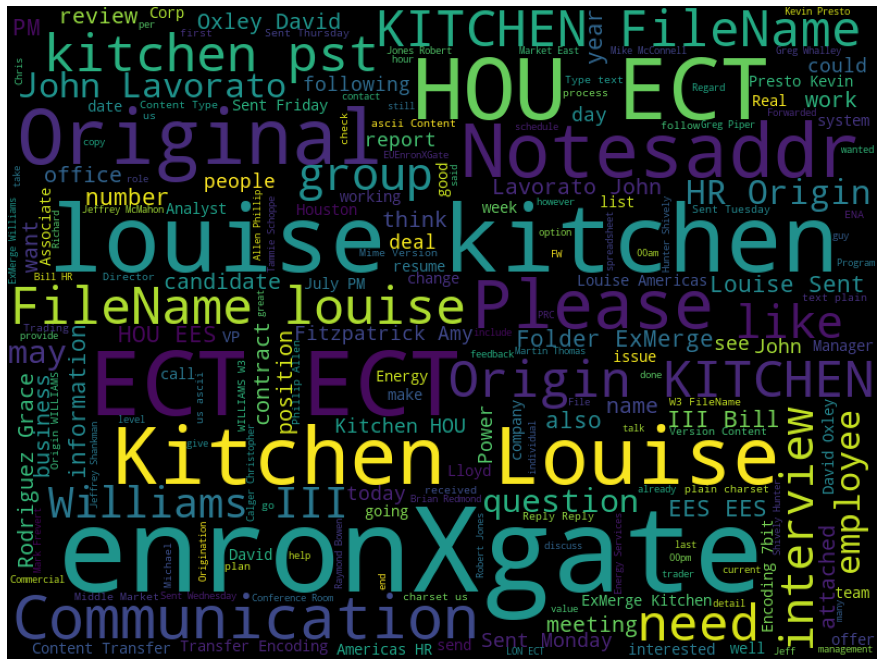

In [5]:
WC_Folder('hr')

In [6]:
def plot_emotions(Folder):
    
    data = df.loc[df['X-Folder'] == Folder]
    
    plot = data.groupby('year').topemotion.value_counts(normalize = True).unstack(0).plot.bar()
    fig = plot.get_figure()
    name = "topemotion_" + Folder+".jpg"
    print(name)
    fig.savefig(name, dpi = 500, quality = 80)    

    
    plot =data.groupby('year').time_hour.value_counts(normalize = True).unstack(0).plot.bar()
    fig = plot.get_figure()
    name = "houremotion_" + Folder+".jpg"
    print(name)
    fig.savefig(name, dpi = 500,  quality = 80)  
    
    plot = data.groupby('year').Work.value_counts(normalize = True).unstack(0).plot.bar()
    fig = plot.get_figure()
    name = "workemotion_" + Folder+".jpg"
    print(name)
    fig.savefig(name, dpi = 500,  quality = 80)  
    
    return
    

In [7]:
df['X-Folder'].value_counts()

personal               1311
hr                      370
it                      242
management              193
resumes                 156
myfriends               143
interviews              123
personalfolder           99
federal legislation      48
kpmg                     40
Name: X-Folder, dtype: int64

topemotion_management.jpg


<ipython-input-6-93e49a92c02a>:9: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig.savefig(name, dpi = 500, quality = 80)


houremotion_management.jpg


<ipython-input-6-93e49a92c02a>:16: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig.savefig(name, dpi = 500,  quality = 80)


workemotion_management.jpg


<ipython-input-6-93e49a92c02a>:22: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig.savefig(name, dpi = 500,  quality = 80)


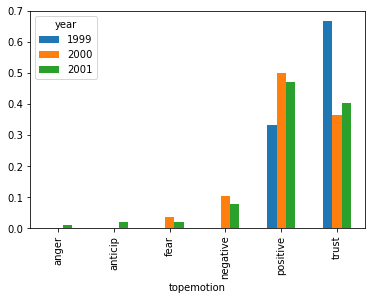

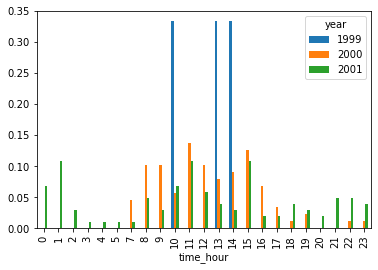

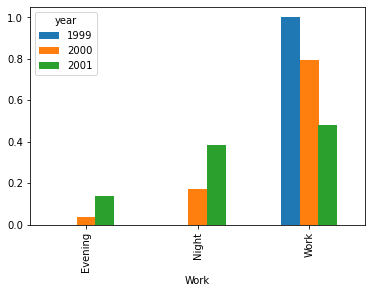

In [8]:
plot_emotions('management')

In [9]:
df_emotions = df.drop(['From', 'Date', 'Subject', 'To',
       'X-cc', 'X-Origin','time_hour'], axis=1)

In [10]:
folder = 'federal legislation'
df_emotions =df_emotions.loc[df_emotions['X-Folder'] == folder]
df_emotions =df_emotions.groupby(['year'], as_index=False).mean()
df_emotions.set_index('year', inplace=True)


In [11]:
# df_emotions['top_emotion'] = df_emotions.max(axis=1,numeric_only=True)

In [12]:
df_emotions.head()

,subjectivity,polarity,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
year,,,,,,,,,,,,
1999,0.277778,0.011111,0.089385,0.089385,0.106145,0.128492,0.094972,0.100559,0.100559,0.106145,0.094972,0.089385
2000,0.448825,0.062781,0.095280,0.094652,0.101269,0.116108,0.085786,0.113952,0.111330,0.098040,0.092593,0.090988
2001,0.419552,0.093865,0.095281,0.094072,0.098197,0.113304,0.089219,0.112027,0.112275,0.097223,0.096798,0.091605


In [13]:
df_emotions.columns

Index(['subjectivity ', 'polarity', 'fear', 'anger', 'anticip', 'trust',
       'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy'],
      dtype='object')

In [14]:
df_emotions.loc[df_emotions.index == 1999]
df_emotions = df_emotions.drop(columns = ['subjectivity ', 'polarity'], axis=1)
df_emotions['top'] = df_emotions.idxmax(axis=1)
df_emotions.head()

,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,top
year,,,,,,,,,,,
1999,0.089385,0.089385,0.106145,0.128492,0.094972,0.100559,0.100559,0.106145,0.094972,0.089385,trust
2000,0.095280,0.094652,0.101269,0.116108,0.085786,0.113952,0.111330,0.098040,0.092593,0.090988,trust
2001,0.095281,0.094072,0.098197,0.113304,0.089219,0.112027,0.112275,0.097223,0.096798,0.091605,trust


In [15]:
df_emotions.to_csv('dataset_for_emotions.csv', index=False)

In [29]:
def emotions_loader(df, folder, year_of_interest=None):
    

    df_emotions = df
    
    if year_of_interest != None:
        df_emotions = df_emotions.loc[df_emotions.index == year_of_interest]
    for index, row in df_emotions.iterrows():
        label=row['top'] 
        print(row['top'])
        score = row[label]
        print(row[label])
        
        return f"Top feeling is: {label} {round(score*100)}%"

In [30]:
emotions_loader(df_emotions, 'hr')

trust
0.12849162011173185


'Top feeling is: trust 13%'

In [18]:
for index, row in df_emotions.iterrows():
    row['top']

for index, row in df_emotions.iterrows():
    for label in ['fear','anger','trust','positive']:
        print(row[label]*100)

8.938547486033519
8.938547486033519
12.849162011173185
10.05586592178771
9.528008319589519
9.465247850518114
11.610820038344741
11.395208721391567
9.528095490966363
9.407167275090254
11.330374886932976
11.202660801241178


In [19]:
import emoji 
emotion = 'anger'
for index, row in df_emotions.iterrows():
    score = row[emotion]
    print(f'{emotion}: {round(score*100)}% ')
    print(emoji.emojize(":anger: :rage:", use_aliases=True))
    
emotion = 'trust'
for index, row in df_emotions.iterrows():
    score = row[emotion]
    print(f'{emotion}: {round(score*100)}% ')
    print(emoji.emojize(":white_check_mark: :thumbsup:", use_aliases=True))
    
emotion = 'fear'
for index, row in df_emotions.iterrows():
    score = row[emotion]
    print(f'{emotion}: {round(score*100)}% ')
    print(emoji.emojize(":fearful: :scream:", use_aliases=True))

emotion = 'fear'
for index, row in df_emotions.iterrows():
    score = row[emotion]
    print(f'{emotion}: {round(score*100)}% ')
    print(emoji.emojize(":fearful: :scream:", use_aliases=True))
    
emotion = 'positive'
for index, row in df_emotions.iterrows():
    score = row[emotion]
    print(f'{emotion}: {round(score*100)}% ')
    print(emoji.emojize(":fearful: :scream:", use_aliases=True))

anger: 9% 
💢 😡
anger: 9% 
💢 😡
anger: 9% 
💢 😡
trust: 13% 
✅ 👍
trust: 12% 
✅ 👍
trust: 11% 
✅ 👍
fear: 9% 
😨 😱
fear: 10% 
😨 😱
fear: 10% 
😨 😱
fear: 9% 
😨 😱
fear: 10% 
😨 😱
fear: 10% 
😨 😱
positive: 10% 
😨 😱
positive: 11% 
😨 😱
positive: 11% 
😨 😱


In [20]:
### Sentiments as emojies:

import emoji

def give_emoji_sentiment(score):
    
    if score == 0:
        print(f'Happiness: {round(score*100)}% ')
        print(emoji.emojize("Too many poker faces :expressionless:", use_aliases=True))
    elif (score >0 and score <0.5):
        print(f'Happiness: {round(score*100)}% ')
        print(emoji.emojize("People is slightly happy :blush: ", use_aliases=True))
    elif score > 0.5:
        print(f'Happiness: {round(score*100)}% ')
        print(emoji.emojize("Happy people :smile:", use_aliases=True))
    else:
        print(f'Happiness: {round(score*100)}% ')
        print(emoji.emojize("Angry birds :angry:", use_aliases=True))

          
        
def give_emoji_subjectivity(score):
    
    if score == 0: #Very objective
        print(emoji.emojize("A :100:% objective department :speech_balloon: :pencil:", use_aliases=True))
    elif score == 1: #Very subjective
        print(emoji.emojize("A very subjective department :thought_balloon:", use_aliases=True)) 
    else:
        print(emoji.emojize(f"{100 - round(score*100)}% Objective :thought_balloon: ", use_aliases=True))


In [21]:
for index, row in df_emotions.iterrows():
    for label in ['fear','anger','trust','positive']:
        print(row[label]*100)

8.938547486033519
8.938547486033519
12.849162011173185
10.05586592178771
9.528008319589519
9.465247850518114
11.610820038344741
11.395208721391567
9.528095490966363
9.407167275090254
11.330374886932976
11.202660801241178
